NOTE1: You do not have to use the docs or data from HW1. You can find, use, or create any data you wish for this assignment. 

and use AMT platform to request five sentiment labels per document. Note that you can set up your tasks in different ways, such as hiring five workers, each annotating all comments, or hiring 10 workers, each annotating half of the comments, etc.

NOTE2: Class – the goal here is to realize that sometimes you need labeled data, but do not have it. This happens in real life very often. I suggest that you find, use, or create 6 small doc – __three (3) positive__ and __three (3) negative__ – such as movie or restaurant reviews. Make 4 of them really easy. For example, an easy one that is positive would have words like good, like, love, great, excellent, etc. or for negative, words like bad, poor, dislike, etc. Then, make two of the six ambiguous  - such as using sarcasm, etc. These are just ideas. You may use whatever you wish. The goal is ot create something that makes sense to you, so that you understand the results. 

Next, you will practice using something new. Amazon Mechanical Turk (AMT). Learn about it. Google it. Then use it on your 6 (or so) docs. Did the “Turkers” labels correctly? What did they get wrong? How long did it take? How much did it cost? Etc. 

After obtaining the labels, calculate pair-wise Kappa values among the AMT workers, and then calculate the average Kappa value as the overall agreement among the AMT workers. Also calculate the Kappa agreement between each AMT worker's annotations and your manual annotations. Based on these calculations, discuss the AMT workers' annotation reliability.

NOTE 3: Use YouTube to learn how to calculate Kappa. The math is easy and so this is a great opportunity to practice taking the lead and learning something new without a Guide. 

Describe in your report:

NOTE 4: Please use the Assignment Format. Remember – the topic is whatever the dataset is about. The Analysis is the AMT and labeling part. The Results are what happened. The conclusions might include whether a restaurant owner (if you data is about restaurants for example0 can use this method to better understand the sentiment of 1 million reviews, etc. 

Also include the following in the appropriate location in the format assignment….

a.	The experiment design: How many turkers do you aim to hire? What is the workload and payment for each turker? What is your requirement for the turkers (language proficiency, geographical location, past work performance, etc.)? Please also explain why you think this is the best choice for your experiment design to obtain the best-quality data in the most efficient way, e.g., your spam-control strategy.  

b.	The experiment outcome: How long did it take to obtain all labels? How much did you pay in total? Did any unexpected events occur during the process? Did you find any spammers? If yes, how did you find out and remove spam data? What is the average Kappa agreement among the workers? What are their levels of agreement with your ground truth? Do all AMT workers share similar marginal distributions?  

c.	Conclusion: Do you think AMT is a viable approach for obtaining training labels? What lessons did you learn in this experiment?  


|||B||
|--|---|---|---|
|||Yes|No|
|A|Yes|a|b|
||No|c|d|


$P_o$ (observe agreement/the probability of random agreement) $=$ $\frac{a+d}{a+b+c+d}$  
 
$P_e$ (expect agreement/the probability of expect agreement)) $=$ $P_{Yes} + P_{No}$ $=$ $\frac{a+b}{a+b+c+d} * \frac{a+c}{a+b+c+d} + \frac{c+d}{a+b+c+d} * \frac{b+d}{a+b+c+d}$  
$K$ (Cohen's Kappa) $=$ $\frac{P_o-P_e}{1-Pe} = 1-\frac{1- P_o}{1-Pe}$  

[Kappa](https://en.wikipedia.org/wiki/Cohen%27s_kappa)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)

In [2]:
yelp = pd.read_csv('text.csv', index_col='doc')

In [3]:
yelp.loc[:,['stars', 'text', 'label']]

,stars,text,label
doc,,,
1,1,"Went to Fatburger with our family tonight and will not return. Average food. The burgers were average. The lettuce was wilted, the tomato was green, and nothing outstanding about the flavor. I'd say better options nearby are Joe's farm grill, In-n-out, or Culvers. Cleanliness was average. The floor was a little sticky and the beverage area was kept very neat. The kitchen appeared clean. Service was below average/horrible. The cashier was very unpleasant. We all ordered at the same time and the first half of the food came out about 15 minutes prior to the 2nd part. It was pretty slow. By the time we got the fries they were cold. The staff literally acted like they were a bunch of highschoolers who were annoyed that there were any customers who interrupted their hangout. I know this sounds harsh...it is. My experience was absolutely horrible. We will not be back and I don't recommend that you should either.",n
2,5,"Being from San Antonio I missed Rudy's so much! This Arizona location is similar, but different. The BBQ is definitely a winner, but their now commercialized packaged BBQ sauce is horrible! Bring back the other stuff in the Styrofoam containers! I will still keep coming for the brisket when I'm in the area!!!!!",p
3,2,"Yelpers giving this place four or five stars are either seriously misguided, don't have refined pallets, or simply haven't tried Bianco or Cibo. This place was over priced, had fairly poor service, and the pizza just wasn't that good.I ordered the sausage pizza. The sausage was pretty bland. They also screwed up my order by adding onions when I didn't ask for them. I've had my order messed up on pizzas before by having toppings left off, but never added on that I simply didn't order. Found that strange. I would have sent it back, but the waiter didn't check to see how everything was until about fifteen minutes after the food was brought to the table.I'd give Humbe Pie 1.5 stars if I could, but rounded up since it is better than Dominos and Pizza Hut. I went after buying the GroupOn coupon, but won't be returning.",n
4,5,"I went with my sister 2 days ago. It was my first time eating Famous Dave's. I got a hamburger and got some mac & cheese. They were both okay, I tasted better. Now the hot wings & onion rings were better. the place was packed we sat outside.",p
5,4,"Via Delosantos is one of the few places in Phoenix that a vegetarian can get a good Mexican meal. Neither the beans or rice are cooked in lard, which is hard to find in this town. The chips and salsa are premium, just watch out for the fried potatoes and such - very greasy. Thanks to Philip's illuminating review, I hadn't heard about their health code violations. It's something I'll keep an eye on in the future though... if they take another dive like they did in 2004 I'll keep my distance for a while.",p
6,2,"The food leans toward the SouthWest and is located near Old Scottsdale. The place has a couple of patios as well as couches/easy chairs for seating. Large curved bar with televisions. Tons of tequila.The place tends to be busy because of its location, however the food is nothing special - burgers, wraps, tacos, etc. Prices are steep considering what you get. Service can be spotty depending on time of day.",n


In [4]:
sentiment_map = {'n':0, 'p':1}
AMT = yelp.loc[:,'label':'R'].copy()
AMT

,label,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
doc,,,,,,,,,,,,,,,,,,,
1,n,NaN,n,p,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,p,NaN
2,p,p,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,p,NaN,NaN,NaN,n,p,NaN
3,n,NaN,NaN,NaN,NaN,n,n,NaN,NaN,NaN,p,NaN,NaN,NaN,NaN,NaN,n,p,NaN
4,p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p,p,p,p,NaN,NaN,p
5,p,NaN,NaN,NaN,NaN,NaN,NaN,p,p,NaN,p,NaN,NaN,NaN,NaN,NaN,p,p,NaN
6,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,p,n,NaN,NaN,NaN,NaN,n,p,NaN


In [5]:
doc = ['doc1','doc2','doc3','doc4','doc5', 'doc6']
tucker = [5,5,5,5,5,5]
vote = [(2/5), (3/5), (2/5), 1, 1, (2/5)]
match = [0,0,0,1,1,0]
tucker_df = pd.DataFrame({'doc':doc, 'tucker':tucker, 'vote':vote})

Text(0.5, 1.0, 'Votes from Tuckers')

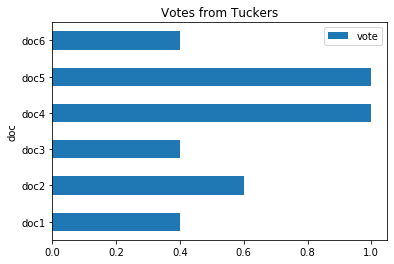

In [6]:
tucker_df.plot(kind='barh', x='doc', y='vote')
plt.title('Votes from Tuckers')

In [7]:
yelp.columns

Index(['stars', 'label', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
       'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'text'],
      dtype='object')

In [8]:
#pip install -U scikit-learn

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

(2.0, 0.0)

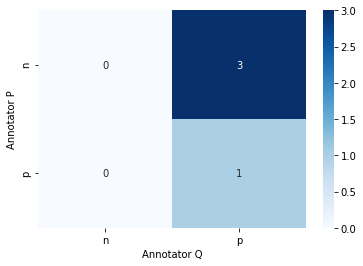

In [10]:
cfm = confusion_matrix(['n','n','p','n'],['p','p','p','p']) # P and Q
#cmap = sns.diverging_palette(258, 0, n=2, as_cmap=True)
hm = sns.heatmap(cfm,annot=True, cmap='Blues')
bottom, top = hm.get_ylim()
hm.set(xticklabels=['n', 'p'])
hm.set(yticklabels=['n', 'p'])
hm.set(ylabel='Annotator P', xlabel='Annotator Q')
hm.set_ylim(bottom + 0.5, top - 0.5)

In [11]:
GroundTruth = ['p','p','p','p','p',
               'n','n','n','n','n',
               'p','p','p','p','p',
               'n','n','n','n','n',
               'n','n','n','n','n',
               'p','p','p','p','p']
TuckerLabel = ['p','p','p','p','p',
               'p','n','p','n','n',
               'p','p','p','p','p',
               'p','n','n','p','n',
               'n','n','p','p','n',
               'n','n','p','p','p']

(2.0, 0.0)

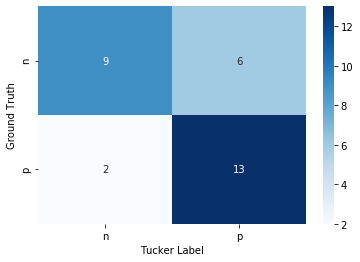

In [12]:
cfm = confusion_matrix(GroundTruth,TuckerLabel)
#cmap = sns.diverging_palette(258, 0, n=2, as_cmap=True)
hm = sns.heatmap(cfm,annot=True, cmap='Blues')
bottom, top = hm.get_ylim()
hm.set(xticklabels=['n', 'p'])
hm.set(yticklabels=['n', 'p'])
hm.set(ylabel='Ground Truth', xlabel='Tucker Label')
hm.set_ylim(bottom + 0.5, top - 0.5)